# 2019 Flight Data EDA

Link to the dataset: https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations?select=full_data_flightdelay.csv

## Load Libraries and Import the Data

In [ ]:
# Import Relevant Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import branca
import branca.colormap as cm

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read in data
delays = pd.read_csv('/content/drive/MyDrive/Data/full_data_flightdelay.csv')
delays.head()

MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  SEGMENT_NUMBER  \
0      1            7          0    0800-0859               2               1   
1      1            7          0    0700-0759               7               1   
2      1            7          0    0600-0659               7               1   
3      1            7          0    0600-0659               9               1   
4      1            7          0    0001-0559               7               1   

   CONCURRENT_FLIGHTS  NUMBER_OF_SEATS            CARRIER_NAME  \
0                  25              143  Southwest Airlines Co.   
1                  29              191    Delta Air Lines Inc.   
2                  27              199    Delta Air Lines Inc.   
3                  27              180    Delta Air Lines Inc.   
4                  10              182        Spirit Air Lines   

   AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
0                  13056                 107363   
1                  13056                  73508   
2                  13056                  73508   
3                  13056                  73508   
4                  13056                  15023   

   AIRLINE_AIRPORT_FLIGHTS_MONTH  AVG_MONTHLY_PASS_AIRPORT  \
0                           5873                   1903352   
1                           1174                   1903352   
2                           1174                   1903352   
3                           1174                   1903352   
4                           1257                   1903352   

   AVG_MONTHLY_PASS_AIRLINE  FLT_ATTENDANTS_PER_PASS  GROUND_SERV_PER_PASS  \
0                  13382999                 0.000062              0.000099   
1                  12460183                 0.000144              0.000149   
2                  12460183                 0.000144              0.000149   
3                  12460183                 0.000144              0.000149   
4                   2688839                 0.000009              0.000125   

   PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  LONGITUDE PREVIOUS_AIRPORT  \
0          8  McCarran International     36.08   -115.152             NONE   
1          3  McCarran International     36.08   -115.152             NONE   
2         18  McCarran International     36.08   -115.152             NONE   
3          2  McCarran International     36.08   -115.152             NONE   
4          1  McCarran International     36.08   -115.152             NONE   

   PRCP  SNOW  SNWD  TMAX  AWND  
0   0.0   0.0   0.0  65.0  2.91  
1   0.0   0.0   0.0  65.0  2.91  
2   0.0   0.0   0.0  65.0  2.91  
3   0.0   0.0   0.0  65.0  2.91  
4   0.0   0.0   0.0  65.0  2.91

## Data Preparation and Cleaning

Task List:
1. Understand columns
2. Recode Appropriate Columns
3. Check for and fill in nulls and erroneous where applicable
4. Subset the data to include only relevant columns

### 1. Understand Columns

#### Column Descriptions



0. MONTH: Month
1. DAY_OF_WEEK: Day of the week
2. DEP_DEL15: if delayed over 15 min, 1 is yes, 0 is no
3. DEP_TIME_BLK: Departure time block
4. DISTANCE_GROUP: Flight distance group
5. SEGMENT_NUMBER: The segment that this tail number is on for the day
6. CONCURRENT_FLIGHT: # of concurrent flights leaving from the airport in the same departure block
7. NUMBER_OF_SEATS: Number of seats in the aircraft
8. CARRIER_NAME: Carrier name
9. AIRPORT_FLIGHTS_MONTH: Avg Airport Flights per Month
10. AIRLINE_FLIGHTS_MONTH: Avg Airline Flights per Month
11. AIRLINE_AIRPORT_FLIGHTS_MONTH: Avg Flights per month for Airline AND Airport
12. AVG_MONTHLY_PASS_AIRPORT: Avg Passengers for the departing airport for the month
13. AVG_MONTHLY_PASS_AIRLINE: Avg Passengers for airline for month
14. FLT_ATTENDANTS_PER_PASS: Flight attendants per passenger for airline
15. GROUND_SERV_PER_PASS: Ground service employees (service desk) per passenger for airline
16. PLANE_AGE: Age of departing aircraft
17. DEPARTING_AIRPORT: Departing Airport
18. LATITUDE: Latitude of departing airport
19. LONGITUDE: Longitude of departing airport
20. PREVIOUS_AIRPORT: Previous airport that aircraft departed from
21. PRCP: Inches of precipitation for day
22. SNOW: Inches of snowfall for day
23. SNWD: Inches of snow on ground for day
24. TMAX: Max temperature for day
25. AWND: Max wind speed for day

#### Column Datatypes and Numerical Statistics

In [ ]:
delays.info()
# data frame is 6.5 million rows by 25 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

In [ ]:
delays.describe()

MONTH   DAY_OF_WEEK     DEP_DEL15  DISTANCE_GROUP  \
count  6.489062e+06  6.489062e+06  6.489062e+06    6.489062e+06   
mean   6.607062e+00  3.935598e+00  1.891441e-01    3.821102e+00   
std    3.396853e+00  1.995200e+00  3.916231e-01    2.382233e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00    1.000000e+00   
25%    4.000000e+00  2.000000e+00  0.000000e+00    2.000000e+00   
50%    7.000000e+00  4.000000e+00  0.000000e+00    3.000000e+00   
75%    1.000000e+01  6.000000e+00  0.000000e+00    5.000000e+00   
max    1.200000e+01  7.000000e+00  1.000000e+00    1.100000e+01   

       SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
count    6.489062e+06        6.489062e+06     6.489062e+06   
mean     3.046890e+00        2.783675e+01     1.337397e+02   
std      1.757864e+00        2.151060e+01     4.645213e+01   
min      1.000000e+00        1.000000e+00     4.400000e+01   
25%      2.000000e+00        1.100000e+01     9.000000e+01   
50%      3.000000e+00        2.300000e+01     1.430000e+02   
75%      4.000000e+00        3.900000e+01     1.720000e+02   
max      1.500000e+01        1.090000e+02     3.370000e+02   

       AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
count           6.489062e+06           6.489062e+06   
mean            1.268458e+04           6.296058e+04   
std             8.839796e+03           3.438223e+04   
min             1.100000e+03           5.582000e+03   
25%             5.345000e+03           2.503400e+04   
50%             1.156200e+04           7.087800e+04   
75%             1.761500e+04           8.631200e+04   
max             3.525600e+04           1.177280e+05   

       AIRLINE_AIRPORT_FLIGHTS_MONTH  AVG_MONTHLY_PASS_AIRPORT  \
count                   6.489062e+06              6.489062e+06   
mean                    3.459251e+03              1.588639e+06   
std                     4.251139e+03              1.123847e+06   
min                     1.000000e+00              7.047600e+04   
25%                     6.540000e+02              6.732210e+05   
50%                     2.251000e+03              1.486066e+06   
75%                     4.806000e+03              2.006675e+06   
max                     2.183700e+04              4.365661e+06   

       AVG_MONTHLY_PASS_AIRLINE  FLT_ATTENDANTS_PER_PASS  \
count              6.489062e+06             6.489062e+06   
mean               7.814970e+06             9.753707e-05   
std                5.046882e+06             8.644459e-05   
min                4.737940e+05             0.000000e+00   
25%                2.688839e+06             3.419267e-05   
50%                8.501631e+06             6.178236e-05   
75%                1.246018e+07             1.441659e-04   
max                1.338300e+07             3.484077e-04   

       GROUND_SERV_PER_PASS     PLANE_AGE      LATITUDE     LONGITUDE  \
count          6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06   
mean           1.355612e-04  1.153211e+01  3.670581e+01 -9.425515e+01   
std            4.649970e-05  6.935706e+00  5.500804e+00  1.790952e+01   
min            7.134695e-06  0.000000e+00  1.844000e+01 -1.593460e+02   
25%            9.889412e-05  5.000000e+00  3.343600e+01 -1.063770e+02   
50%            1.246511e-04  1.200000e+01  3.750500e+01 -8.790600e+01   
75%            1.772872e-04  1.700000e+01  4.077900e+01 -8.093600e+01   
max            2.289855e-04  3.200000e+01  6.116900e+01 -6.600200e+01   

               PRCP          SNOW          SNWD          TMAX          AWND  
count  6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06  
mean   1.037063e-01  3.159310e-02  9.152397e-02  7.146846e+01  8.341329e+00  
std    3.432134e-01  3.170163e-01  7.281285e-01  1.835333e+01  3.607604e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+01  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  5.900000e+01  5.820000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  7.400000e+01  7.830000e+00  
75%    2.000000

#### View columns where the title/description is vague or unclear

In [ ]:
delays['DEP_TIME_BLK'].value_counts()
# Most flights occurred from 6 am to 8 am
# This column could be converted into an hour column

0800-0859    452391
0700-0759    436032
0600-0659    430404
1700-1759    408878
1200-1259    398009
1000-1059    397751
0900-0959    396112
1100-1159    394884
1500-1559    388240
1400-1459    375981
1800-1859    374866
1600-1659    368464
1900-1959    358165
1300-1359    353000
2000-2059    342123
2100-2159    221087
2200-2259    193229
0001-0559    148580
2300-2359     50866
Name: DEP_TIME_BLK, dtype: int64

In [ ]:
timeframes = np.sort(delays['DEP_TIME_BLK'].unique())
timeframes

array(['0001-0559', '0600-0659', '0700-0759', '0800-0859', '0900-0959',
       '1000-1059', '1100-1159', '1200-1259', '1300-1359', '1400-1459',
       '1500-1559', '1600-1659', '1700-1759', '1800-1859', '1900-1959',
       '2000-2059', '2100-2159', '2200-2259', '2300-2359'], dtype=object)

In [ ]:
len(timeframes)
# not all hours of the day
# after looking into the reason, there are mandated hours where airlines cannot 
# take off or land planes to limit the amount of noise for residents near by

19

In [ ]:
delays['DISTANCE_GROUP'].value_counts()
# I guess the shorter distances traveled are smaller group numbers and the 
# opposite for larger distances. The documentation does not describe how this 
# variable was encoded so there is no way to determine what the distances are 
# per group.

2     1547851
3     1315004
4     1029580
1      717985
5      703113
6      300148
7      289456
10     188059
8      155872
11     135096
9      106898
Name: DISTANCE_GROUP, dtype: int64

I am trying to see if `AIRPORT_FLIGHTS_MONTH`, `AIRLINE_FLIGHTS_MONTH`,`AIRLINE_AIRPORT_FLIGHTS_MONTH`, `AVG_MONTHLY_PASS_AIRPORT`, `AVG_MONTHLY_PASS_AIRLINE`, `FLT_ATTENDANTS_PER_PASS`, and `GROUND_SERV_PER_PASS` are calculated columns

In [ ]:
pri_delays = delays.loc[
    delays["DEPARTING_AIRPORT"] == "Puerto Rico International",
    [
        "MONTH",
        "DEPARTING_AIRPORT",
        "AIRPORT_FLIGHTS_MONTH",
        "AVG_MONTHLY_PASS_AIRPORT",
    ],
]
pri_delays["MONTH"].value_counts()
# There seems to be only flight data from January for Puerto Rico International

1    84
Name: MONTH, dtype: int64

In [ ]:
newark_delays = delays.loc[
    delays["DEPARTING_AIRPORT"] == "Newark Liberty International",
    [
        "MONTH",
        "DEPARTING_AIRPORT",
        "AIRPORT_FLIGHTS_MONTH",
        "AVG_MONTHLY_PASS_AIRPORT",
    ],
]
# print(newark_delays['MONTH'].value_counts())
newark_delays.drop_duplicates()
# AIRPORT_FLIGHTS_MONTH appears to be a calculated column derived from the count
# of each flight aggregated by MONTH.
# AVG_MONTHLY_PASS_AIRPORT appears to be the product of two column sums divided 
# by 12 months

MONTH             DEPARTING_AIRPORT  AIRPORT_FLIGHTS_MONTH  \
34154        1  Newark Liberty International                  10281   
508351       2  Newark Liberty International                   9514   
962021       3  Newark Liberty International                  11562   
1526074      4  Newark Liberty International                  11588   
2049927      5  Newark Liberty International                  11587   
2601468      6  Newark Liberty International                  10792   
3171792      7  Newark Liberty International                  10917   
3761484      8  Newark Liberty International                  11012   
4319659      9  Newark Liberty International                  10832   
4855319     10  Newark Liberty International                  11962   
5460694     11  Newark Liberty International                  11105   
5946083     12  Newark Liberty International                  11326   

         AVG_MONTHLY_PASS_AIRPORT  
34154                     1708599  
508351                    1708599  
962021                    1708599  
1526074                   1708599  
2049927                   1708599  
2601468                   1708599  
3171792                   1708599  
3761484                   1708599  
4319659                   1708599  
4855319                   1708599  
5460694                   1708599  
5946083                   1708599

In [ ]:
newark_delays.value_counts()
# Indeed, AIRPORT_FLIGHTS_MONTH is an aggregated column and the same is true for
# AIRLINE_FLIGHTS_MONTH

MONTH  DEPARTING_AIRPORT             AIRPORT_FLIGHTS_MONTH  AVG_MONTHLY_PASS_AIRPORT
10     Newark Liberty International  11962                  1708599                     11962
4      Newark Liberty International  11588                  1708599                     11588
5      Newark Liberty International  11587                  1708599                     11587
3      Newark Liberty International  11562                  1708599                     11562
12     Newark Liberty International  11326                  1708599                     11326
11     Newark Liberty International  11105                  1708599                     11105
8      Newark Liberty International  11012                  1708599                     11012
7      Newark Liberty International  10917                  1708599                     10917
9      Newark Liberty International  10832                  1708599                     10832
6      Newark Liberty International  10792                  1708599  

In [ ]:
# get all columns for newark liberty international
newark_delays = delays.loc[
    delays["DEPARTING_AIRPORT"] == "Newark Liberty International"
]

# I can't seem to derive the calculations for AVG_MONTHLY_PASS_AIRPORT or 
# AVG_MONTHLY_PASS_AIRLINE; I probably need a passenger count for each flight.
# I tried finding the total number of seats per month, summing these values for 
# the year, and then dividing it by twelve to get the monthly rate
print(
    newark_delays[['MONTH', 'NUMBER_OF_SEATS',]].groupby('MONTH').sum().sum()/12
)

# And I tried taking the mean number of seats and multiplying it by the mean 
#number of flights per month
print(
    newark_delays['NUMBER_OF_SEATS'].mean() 
    * newark_delays['AIRPORT_FLIGHTS_MONTH'].mean()
)

NUMBER_OF_SEATS    1.533745e+06
dtype: float64
1538814.2998766971


In [ ]:
pri_delays = delays.loc[
    delays["DEPARTING_AIRPORT"] == "Puerto Rico International"
]

pri_delays.loc[
    (pri_delays["NUMBER_OF_SEATS"] == 230)
    | (pri_delays["NUMBER_OF_SEATS"] == 160),
    ["NUMBER_OF_SEATS", "FLT_ATTENDANTS_PER_PASS", "GROUND_SERV_PER_PASS"],
]
# Both FLT_ATTENDANTS_PER_PASS and GROUND_SERV_PER_PASS appear to be a function 
# of number of seats

NUMBER_OF_SEATS  FLT_ATTENDANTS_PER_PASS  GROUND_SERV_PER_PASS
381516              230                 0.000116              0.000007
381517              230                 0.000116              0.000007
381518              160                 0.000098              0.000177
381542              160                 0.000098              0.000177
381563              160                 0.000098              0.000177
381580              160                 0.000098              0.000177
381593              160                 0.000098              0.000177

### 2. Recode Appropriate Columns

- Convert `DEP_TIME_BLK` to int and rename as `DEP_HOUR`
- Keep `MONTH` and `DAY_OF_WEEK` as numerically encoded values
- Decode theses numerical codes for axis labels when needed 

#### Create new hour column from `DEP_TIME_BLK`

In [ ]:
# take the first two characters from DEP_TIME_BLK into new column
delays["DEP_HOUR"] = [x[:2] for x in delays["DEP_TIME_BLK"]]

# Strip column of leading zero if the hour is not 0
# delays['DEP_HOUR'] = [x.lstrip('0') if x.lstrip('0') != '' else '0' for x in delays['DEP_HOUR']]

# Strip column of leading zero if the hour is not 0
delays["DEP_HOUR"] = [
    int(x.lstrip("0")) if x.lstrip("0") != "" else 0 for x in delays["DEP_HOUR"]
]
delays[["DEP_TIME_BLK", "DEP_HOUR"]].head(10)


DEP_TIME_BLK  DEP_HOUR
0    0800-0859         8
1    0700-0759         7
2    0600-0659         6
3    0600-0659         6
4    0001-0559         0
5    0001-0559         0
6    0700-0759         7
7    0001-0559         0
8    0001-0559         0
9    0600-0659         6

In [ ]:
# check to make sure it worked as intended
delays[['DEP_TIME_BLK', 'DEP_HOUR']].value_counts()

DEP_TIME_BLK  DEP_HOUR
0800-0859     8           452391
0700-0759     7           436032
0600-0659     6           430404
1700-1759     17          408878
1200-1259     12          398009
1000-1059     10          397751
0900-0959     9           396112
1100-1159     11          394884
1500-1559     15          388240
1400-1459     14          375981
1800-1859     18          374866
1600-1659     16          368464
1900-1959     19          358165
1300-1359     13          353000
2000-2059     20          342123
2100-2159     21          221087
2200-2259     22          193229
0001-0559     0           148580
2300-2359     23           50866
dtype: int64

#### Determine dictionary for `DAY_OF_WEEK` column

In [ ]:
delays['DAY_OF_WEEK'].value_counts()  # 1-7; Mon is 1 and Sun is 7

5    969141
1    967364
4    955682
2    946470
3    938328
7    922159
6    789918
Name: DAY_OF_WEEK, dtype: int64

In [ ]:
day_names = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# create a list of the code for each day
day_codes = list(np.sort(delays['DAY_OF_WEEK'].unique()))

# zip these two lists together and create a dictionary
day_dict = dict([z for z in zip(day_codes, day_names)])
day_dict  # view dictionary

{1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday',
 7: 'Sunday'}

In [ ]:
# If I wanted to decode this columns, this is how I would've done it

# use each code as the key to get the right day name for the new column
# delays['DAY_NAME'] = [day_dict[x] for x in delays['DAY_OF_WEEK']]

# check to make sure it worked
# delays[['DAY_OF_WEEK', 'DAY_NAME']].drop_duplicates().sort_values('DAY_OF_WEEK')

#### Determine dictionary for `MONTH` column

In [ ]:
# create a list of the code for each month
month_codes = list(delays['MONTH'].unique())

month_codes
# 1-12; Jan is 1 and Dec is 12; All twelve months are present in the dataset

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
month_names = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

# zip these two lists together and create a dictionary
month_dict = dict([z for z in zip(month_codes, month_names)])
month_dict  # view dictionary

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [ ]:
# If I wanted to decode this columns, this is how I would've done it

# use each code as the key to get the right day name for the new column
# delays['MONTH_NAME'] = [month_dict[x] for x in delays['MONTH']]

# check to make sure it worked
# delays[['MONTH', 'MONTH_NAME']].drop_duplicates().sort_values('MONTH')

#### Create delayed status dictionary for `DEP_DEL15`
- The minimum increment of time that a flight can be delayed in the US is 15 minutes, hence the renaming of the variable.

In [ ]:
delay_dict = {1 : 'Yes', 0 : 'No'}

# # If I wanted to decode this columns, this is how I would've done it
# delays['DELAYED'] = [delay_dict[x] for x in delays['DEP_DEL15']]

# But I just want to rename the column 
delays['DELAYED'] = delays['DEP_DEL15']

### 3. Check for and Fill in Nulls and Erroneous Data Where Applicable

#### Check for nulls

In [ ]:
delays.isna().sum()
# There are no null values

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
DEP_HOUR                         0
DELAYED                          0
dtype: int64

#### Examining missing flight data found earlier

In [ ]:
# Puerto Rico International only has a month of flight data in 2019
len(
    delays.loc[
        delays["DEPARTING_AIRPORT"] == "Puerto Rico International", "MONTH"
    ].value_counts()
)
# I wonder how many other airports have missing flight data

1

In [ ]:
# 20 other airports are missing flight data for at least one month
num_months_per_airport = (
    delays[["DEPARTING_AIRPORT", "MONTH"]]
    .drop_duplicates()
    .groupby(["DEPARTING_AIRPORT"])["MONTH"]
    .count()
)

len(
    num_months_per_airport[num_months_per_airport < 12]
)
# How many flights will be removed if we remove these airports and their data

20

In [ ]:
# Takes the index (airport) where the number months the dataset has data for is 
# less than 12 and saves it as a list
airports_with_months_missing = num_months_per_airport[
    num_months_per_airport < 12
].index.tolist()

# Counts the number of flights that belong to the airports with missing month
# data
len(
    delays.loc[
        delays["DEPARTING_AIRPORT"].isin(airports_with_months_missing),
        ["DEPARTING_AIRPORT"],
    ]
)
# 182525 flights

182525

In [ ]:
# (Number of flights from airports with missing months of flight data divided by
# All flights from all airports) * 100
print(
    (
        len(
            delays.loc[
                delays["DEPARTING_AIRPORT"].isin(airports_with_months_missing),
                ["DEPARTING_AIRPORT"],
            ]
        )
        / len(delays["DEPARTING_AIRPORT"])
    )
    * 100
)

# 2.8 % of all flights belong to airports with missing months of flight data

2.812810233590001


In [ ]:
# I think we should remove them
delays = delays[~delays['DEPARTING_AIRPORT'].isin(airports_with_months_missing)]

### 4. Subset the data to include only relevant/informative columns

In [ ]:
delays.columns

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'DEP_HOUR', 'DELAYED'],
      dtype='object')

In [ ]:
# Using new columns created in previous section
delays = delays[['MONTH', 'DAY_OF_WEEK', 'DEP_HOUR', 'DELAYED',  
       'NUMBER_OF_SEATS', 'CARRIER_NAME', 'PLANE_AGE', 
       'DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE', 'PRCP', 
       'TMAX']].copy()

## Feature Analysis and Visualizations

Columns to analyze:
1. Target Variable: `DELAYED`
2. Weather Conditions: `PRCP` and `TMAX`
3. Time of flights: `MONTH`, `DAY_OF_WEEK`, `DEP_HOUR`
4. `CARRIER_NAME`
5. Plane Details: `NUMBER_OF_SEATS` and `PLANE_AGE`
6. `DEPARTING_AIRPORT` 
7. Longitude and Latitude
8. Other Feature Analysis

In [ ]:
delays.head()

MONTH  DAY_OF_WEEK  DEP_HOUR  DELAYED  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
0      1            7         8        0                  25              143   
1      1            7         7        0                  29              191   
2      1            7         6        0                  27              199   
3      1            7         6        0                  27              180   
4      1            7         0        0                  10              182   

             CARRIER_NAME  AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
0  Southwest Airlines Co.                  13056                 107363   
1    Delta Air Lines Inc.                  13056                  73508   
2    Delta Air Lines Inc.                  13056                  73508   
3    Delta Air Lines Inc.                  13056                  73508   
4        Spirit Air Lines                  13056                  15023   

   AIRLINE_AIRPORT_FLIGHTS_MONTH  AVG_MONTHLY_PASS_AIRPORT  \
0                           5873                   1903352   
1                           1174                   1903352   
2                           1174                   1903352   
3                           1174                   1903352   
4                           1257                   1903352   

   AVG_MONTHLY_PASS_AIRLINE  FLT_ATTENDANTS_PER_PASS  GROUND_SERV_PER_PASS  \
0                  13382999                 0.000062              0.000099   
1                  12460183                 0.000144              0.000149   
2                  12460183                 0.000144              0.000149   
3                  12460183                 0.000144              0.000149   
4                   2688839                 0.000009              0.000125   

   PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  LONGITUDE  PRCP  SNOW  SNWD  \
0          8  McCarran International     36.08   -115.152   0.0   0.0   0.0   
1          3  McCarran International     36.08   -115.152   0.0   0.0   0.0   
2         18  McCarran International     36.08   -115.152   0.0   0.0   0.0   
3          2  McCarran International     36.08   -115.152   0.0   0.0   0.0   
4          1  McCarran International     36.08   -115.152   0.0   0.0   0.0   

   TMAX  AWND  
0  65.0  2.91  
1  65.0  2.91  
2  65.0  2.91  
3  65.0  2.91  
4  65.0  2.91

### 1. `DELAYED`

#### Analysis

In [ ]:
# Determine the counts of delayed (1) or not delayed (0) flights
delays['DELAYED'].value_counts()

0    5107908
1    1198629
Name: DELAYED, dtype: int64

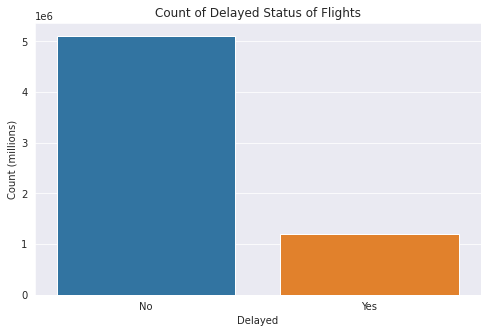

In [ ]:
# Graph these counts
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

sns.countplot(data = delays, x = 'DELAYED')
plt.title('Count of Delayed Status of Flights')
plt.xlabel('Delayed')
plt.ylabel('Count (millions)')

plt.xticks(np.arange(0, 2, 1), [delay_dict[0], delay_dict[1]])

plt.show()


In [ ]:
# Determine the percent of all total flights that were delayed
(delays['DELAYED'].value_counts()[1] / len(delays))*100

19.006136014107266

#### `DELAYED` Insights:
- Out of the 6,306,537 flights in 2019, 1,198,629 of them were delayed
- In other words, 19.01 % of the total number of flights were delayed in 2019
- How this variable is influenced by the other columns will be addressed in their respective analyses since `DELAYED` is the target variable.

### 2. Weather Conditions: `PRCP` and `TMAX`

The columns `PRCP`and `TMAX` record the precipitaion (in inches) and the max temperature on the day of the flight's occurrence, respectively.

In [ ]:
weather_df = delays[['DELAYED', 'PRCP', 'TMAX']].copy()

In [ ]:
weather_df.head()

DELAYED  PRCP  TMAX
0        0   0.0  65.0
1        0   0.0  65.0
2        0   0.0  65.0
3        0   0.0  65.0
4        0   0.0  65.0

##### Descriptive statistics of the weather measures

In [ ]:
weather_df[['PRCP', 'TMAX']].describe()

PRCP          TMAX
count  6.306537e+06  6.306537e+06
mean   1.034196e-01  7.138505e+01
std    3.434608e-01  1.840759e+01
min    0.000000e+00 -1.000000e+01
25%    0.000000e+00  5.900000e+01
50%    0.000000e+00  7.400000e+01
75%    2.000000e-02  8.600000e+01
max    1.163000e+01  1.150000e+02

The average precipitation recorded before a flight was only (0.1 inches). However, the max was precipitation was 11.6 inches. This could be an interesting flight to look at.

The average max temperature on the day of the flight was 71.4 degrees farenheit. The min was -10 and the max was 115. These extremes are cases that I want to investigate further.

##### `PRCP` Analysis

In [ ]:
weather_df.PRCP.value_counts()

0.00    4433162
0.01     221862
0.02     103158
0.03      91909
0.05      78051
         ...   
2.77         43
2.41         38
5.08         38
2.48         27
2.24         21
Name: PRCP, Length: 293, dtype: int64

###### Distribution Visualization

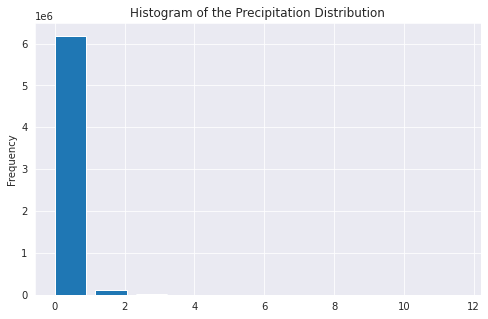

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

# Plots the distribution of precipitation levels recorded for each flight
weather_df.PRCP.plot(kind='hist', width=.9)

plt.ylabel('Frequency')
plt.title('Histogram of the Precipitation Distribution')

plt.show()

# Majority of the flights experienced less than an inch
# The maximum precipitation recorded was over 10 inches

###### Outlier Visualization and Investigation

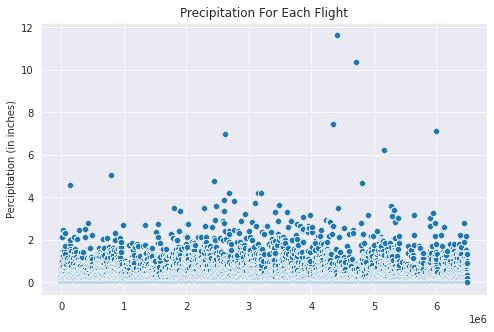

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

# Plots the precipitation for each flight with the index acting as a jitter to 
# separate the data points
sns.scatterplot(data=weather_df, x=weather_df.index, y='PRCP')

plt.ylabel('Precipitation (in inches)')
plt.title('Precipitation For Each Flight')

plt.show()

Looking at the flight with the highest precipitation

In [ ]:
max_precip_df = delays.loc[delays.PRCP == max(weather_df.PRCP)]
max_precip_df

MONTH  DAY_OF_WEEK  DEP_HOUR  DELAYED  NUMBER_OF_SEATS  \
4408545      9            4         6        0              191   
4408546      9            4         6        1              132   
4408547      9            4        11        0              191   
4408548      9            4         6        0              199   
4408549      9            4         7        0              110   
...        ...          ...       ...      ...              ...   
4409018      9            4        20        0               50   
4409019      9            4        20        0               50   
4409020      9            4        22        0               66   
4409021      9            4        20        0               50   
4409022      9            4        22        0               50   

                  CARRIER_NAME  PLANE_AGE                  DEPARTING_AIRPORT  \
4408545   Delta Air Lines Inc.          1  Minneapolis-St Paul International   
4408546   Delta Air Lines Inc.         17  Minneapolis-St Paul International   
4408547   Delta Air Lines Inc.          0  Minneapolis-St Paul International   
4408548   Delta Air Lines Inc.         19  Minneapolis-St Paul International   
4408549   Delta Air Lines Inc.         18  Minneapolis-St Paul International   
...                        ...        ...                                ...   
4409018  SkyWest Airlines Inc.         14  Minneapolis-St Paul International   
4409019  SkyWest Airlines Inc.         16  Minneapolis-St Paul International   
4409020  SkyWest Airlines Inc.         17  Minneapolis-St Paul International   
4409021  SkyWest Airlines Inc.         18  Minneapolis-St Paul International   
4409022  SkyWest Airlines Inc.         16  Minneapolis-St Paul International   

         LATITUDE  LONGITUDE   PRCP  TMAX  
4408545    44.886    -93.218  11.63  82.0  
4408546    44.886    -93.218  11.63  82.0  
4408547    44.886    -93.218  11.63  82.0  
4408548    44.886    -93.218  11.63  82.0  
4408549    44.886    -93.218  11.63  82.0  
...           ...        ...    ...   ...  
4409018    44.886    -93.218  11.63  82.0  
4409019    44.886    -93.218  11.63  82.0  
4409020    44.886    -93.218  11.63  82.0  
4409021    44.886    -93.218  11.63  82.0  
4409022    44.886    -93.218  11.63  82.0  

[478 rows x 12 columns]

In [ ]:
max_precip_df[
    ['DEPARTING_AIRPORT', 'MONTH', 'DAY_OF_WEEK', 'DELAYED']
].value_counts()


DEPARTING_AIRPORT                  MONTH  DAY_OF_WEEK  DELAYED
Minneapolis-St Paul International  9      4            0          377
                                                       1          101
dtype: int64

It looks like the precipitation measurement of 11.63 inches occurred on a Thursday in September of 2019 at the Minneapolis-St Paul International Airport. 478 flights took off that day and only a fifth of the flights or so were delayed (101).

The date was more than likely September 12th, 2019.
URL: https://www.dnr.state.mn.us/climate/journal/rain-and-flooding-september-10-12-2019.html

###### Comparing the percipitation distributions for both the flights that were delayed and the flights that weren't.

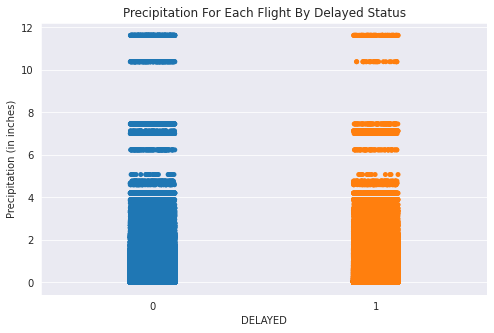

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

# Plots the distribution of precipitation received by delayed status
sns.stripplot(data=weather_df, x='DELAYED', y='PRCP')

plt.ylabel('Precipitation (in inches)')
plt.title('Precipitation For Each Flight By Delayed Status')

plt.show()

##### `TMAX` Analysis

In [ ]:
weather_df.TMAX.value_counts()

 89.0    162377
 91.0    152001
 88.0    145874
 87.0    139849
 90.0    136678
          ...  
 4.0        122
-2.0         55
 85.7        53
-7.0         36
 2.0         23
Name: TMAX, Length: 122, dtype: int64

###### Distribution Visualization

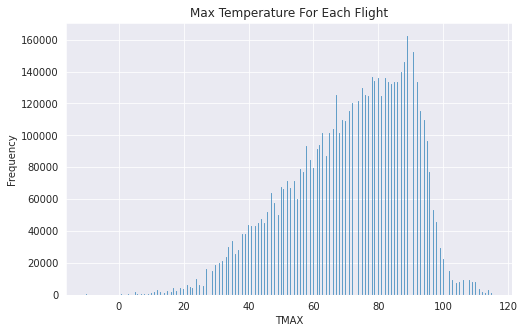

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

# Plots the distribution of max temperature recorded
sns.histplot(data=weather_df, x='TMAX')

plt.ylabel('Frequency')
plt.title('Max Temperature For Each Flight')

plt.show()

###### Outlier Visualization and Investigation

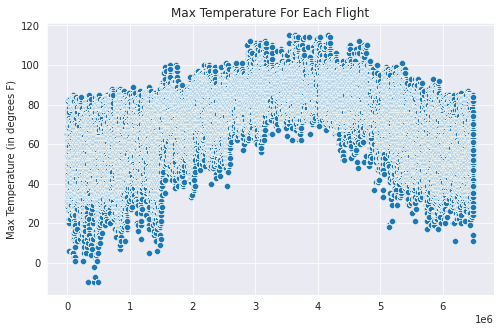

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

# Plots the various max temperatures recorded and the index
# acts as a jitter to separate the data points
sns.scatterplot(data=weather_df, x=weather_df.index, y='TMAX')

plt.ylabel('Max Temperature (in degrees F)')
plt.title('Max Temperature For Each Flight')

plt.show()

It looks like there is a cluster of outliers for flights that recorded the minimum max temperature. The max temperature however, appears to be more common.

 Investigating the minimum max temperature

In [ ]:
# Creates a separate df where the records have a TMAX that equal to the minimum 
# max temp recorded

min_temp_df = delays.loc[delays.TMAX == -10]
min_temp_df

MONTH  DAY_OF_WEEK  DEP_HOUR  DELAYED  NUMBER_OF_SEATS  \
328252      1            3         0        0              228   
328253      1            3        13        1              180   
328254      1            3        16        1              230   
328255      1            3         6        1              110   
328256      1            3         8        1              181   
...       ...          ...       ...      ...              ...   
490398      1            3        15        0              143   
490399      1            3        20        0               66   
490400      1            3        16        0              143   
490401      1            3        18        0              110   
490402      1            3        18        1               66   

                  CARRIER_NAME  PLANE_AGE             DEPARTING_AIRPORT  \
328252        Spirit Air Lines          4  Chicago O'Hare International   
328253  Frontier Airlines Inc.          9  Chicago O'Hare International   
328254  Frontier Airlines Inc.          2  Chicago O'Hare International   
328255    Delta Air Lines Inc.         17  Chicago O'Hare International   
328256    Alaska Airlines Inc.          3  Chicago O'Hare International   
...                        ...        ...                           ...   
490398  Southwest Airlines Co.         14  Chicago Midway International   
490399   SkyWest Airlines Inc.         13  Chicago Midway International   
490400  Southwest Airlines Co.         17  Chicago Midway International   
490401    Delta Air Lines Inc.         17  Chicago Midway International   
490402   SkyWest Airlines Inc.          8  Chicago Midway International   

        LATITUDE  LONGITUDE  PRCP  TMAX  
328252    41.978    -87.906   0.0 -10.0  
328253    41.978    -87.906   0.0 -10.0  
328254    41.978    -87.906   0.0 -10.0  
328255    41.978    -87.906   0.0 -10.0  
328256    41.978    -87.906   0.0 -10.0  
...          ...        ...   ...   ...  
490398    41.785    -87.752   0.0 -10.0  
490399    41.785    -87.752   0.0 -10.0  
490400    41.785    -87.752   0.0 -10.0  
490401    41.785    -87.752   0.0 -10.0  
490402    41.785    -87.752   0.0 -10.0  

[395 rows x 12 columns]

In [ ]:
# Determines the airports with minimum max temp
min_temp_df['DEPARTING_AIRPORT'].unique()

array(["Chicago O'Hare International", 'General Mitchell Field',
       'Chicago Midway International'], dtype=object)

In [ ]:
min_temp_df[['MONTH', 'DAY_OF_WEEK']].value_counts()

MONTH  DAY_OF_WEEK
1      3              395
dtype: int64

In [ ]:
# Delayed status of airports with the minimum max temp
min_temp_df.DELAYED.value_counts()

1    227
0    168
Name: DELAYED, dtype: int64

More than half of the flights were delayed on a Wednesday in January of 2019. The high was -10 degrees Farenheit at three different airports that day - two in Chicago and the other in Milwaukee. These airports are on the west side of Lake Michigan so maybe there was a cold front that came from the lake? 

After doing a bit of research, there was a cold front that occurred on the 30th of January in 2019 (a Wednesday).
URL: https://www.timeanddate.com/weather/usa/chicago/historic?month=1&year=2019

Investigating the maximum max temperature

In [ ]:
max_temp_df = delays.loc[delays.TMAX >= 115]
max_temp_df

# There is no max temperature recorded above 115

MONTH  DAY_OF_WEEK  DEP_HOUR  DELAYED  NUMBER_OF_SEATS  \
3545192      7            2         0        0              143   
3545193      7            2         6        0              143   
3545194      7            2         6        0              143   
3545195      7            2         6        0              143   
3545196      7            2         8        0               76   
...        ...          ...       ...      ...              ...   
4161348      8            1        22        0               66   
4161349      8            1        22        0               66   
4161350      8            1        20        1               66   
4161351      8            1        21        0               76   
4161352      8            1        22        0              143   

                   CARRIER_NAME  PLANE_AGE                 DEPARTING_AIRPORT  \
3545192  Southwest Airlines Co.         12              Tucson International   
3545193  Southwest Airlines Co.         10              Tucson International   
3545194  Southwest Airlines Co.         14              Tucson International   
3545195  Southwest Airlines Co.         15              Tucson International   
3545196      Mesa Airlines Inc.         12              Tucson International   
...                         ...        ...                               ...   
4161348   SkyWest Airlines Inc.         15  Phoenix Sky Harbor International   
4161349   SkyWest Airlines Inc.         14  Phoenix Sky Harbor International   
4161350   SkyWest Airlines Inc.         14  Phoenix Sky Harbor International   
4161351      Mesa Airlines Inc.         12  Phoenix Sky Harbor International   
4161352  Southwest Airlines Co.         13  Phoenix Sky Harbor International   

         LATITUDE  LONGITUDE  PRCP   TMAX  
3545192    32.116   -110.941   0.0  115.0  
3545193    32.116   -110.941   0.0  115.0  
3545194    32.116   -110.941   0.0  115.0  
3545195    32.116   -110.941   0.0  115.0  
3545196    32.116   -110.941   0.0  115.0  
...           ...        ...   ...    ...  
4161348    33.436   -112.009   0.0  115.0  
4161349    33.436   -112.009   0.0  115.0  
4161350    33.436   -112.009   0.0  115.0  
4161351    33.436   -112.009   0.0  115.0  
4161352    33.436   -112.009   0.0  115.0  

[1051 rows x 12 columns]

In [ ]:
# Determine airports that recorded the max temp of 115
max_temp_df.DEPARTING_AIRPORT.unique()

array(['Tucson International', 'Phoenix Sky Harbor International'],
      dtype=object)

In [ ]:
max_temp_df[['DEPARTING_AIRPORT', 'MONTH', 'DAY_OF_WEEK']].value_counts()

DEPARTING_AIRPORT                 MONTH  DAY_OF_WEEK
Phoenix Sky Harbor International  8      1              478
                                  7      2              476
Tucson International              8      1               50
                                  7      2               47
dtype: int64

In [ ]:
# Drill down grouping for delay counts
max_temp_df.groupby(["DEPARTING_AIRPORT", "MONTH", "DAY_OF_WEEK", "DELAYED"])[
    "DELAYED"
].count()

DEPARTING_AIRPORT                 MONTH  DAY_OF_WEEK  DELAYED
Phoenix Sky Harbor International  7      2            0          367
                                                      1          109
                                  8      1            0          419
                                                      1           59
Tucson International              7      2            0           42
                                                      1            5
                                  8      1            0           45
                                                      1            5
Name: DELAYED, dtype: int64

The days with a high of 115 degrees Farenheit occurred in the Phoenix Sky Harbor International Airport and the Tucson International Airport (both in Arizona) during a Tuesday in July and a Monday in August. 

###### Comparing the max temperature distributions for both the flights that were delayed and the flights that weren't.

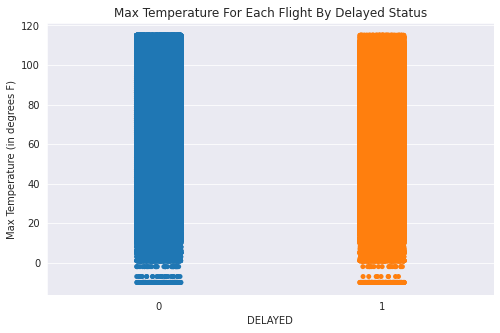

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

# Separate Max Temperature By Delayed Status
sns.stripplot(data=weather_df, x='DELAYED', y='TMAX')

plt.ylabel('Max Temperature (in degrees F)')
plt.title('Max Temperature For Each Flight By Delayed Status')

plt.show()

### 3. Time of Flights (`MONTH`, `DAY_OF_WEEK`, `DEP_HOUR`)


##### `MONTH` Analysis

In [ ]:
# Sort the months by the number of flights that occurred in each month
delays.groupby(["MONTH"])["MONTH"].count().sort_values(ascending=False).rename(
    index=month_dict
)

MONTH
August       557735
July         555116
October      547228
May          540398
March        536955
June         536826
December     535949
April        518762
November     517185
September    516513
January      493673
February     450197
Name: MONTH, dtype: int64

In [ ]:
# Summarize the number of flights per month in 2019
delays.groupby(["MONTH"])["MONTH"].count().sort_values(
    ascending=False
).describe()

count        12.000000
mean     525544.750000
std       29935.867384
min      450197.000000
25%      517017.000000
50%      536387.500000
75%      542105.500000
max      557735.000000
Name: MONTH, dtype: float64

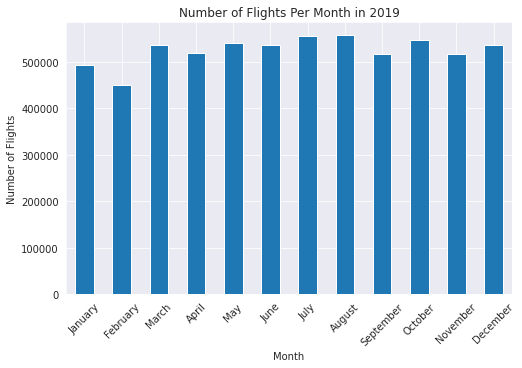

In [ ]:
# Count the total number of flights per month in 2019 and then 
# graph according to month order
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

delays.groupby(["MONTH"])["MONTH"].count().rename(index=month_dict).plot(
    kind="bar"
)

plt.title("Number of Flights Per Month in 2019")
plt.xlabel("Month")
plt.ylabel("Number of Flights")

plt.xticks(np.arange(0, 12, 1), rotation=45)

plt.show()


In [ ]:
# Where the number of flights are delayed, count the total of flights by month
delays.loc[delays["DELAYED"] == 1].groupby(["MONTH"])[
    "MONTH"
].count().sort_values(ascending=False).rename(index=month_dict)

MONTH
June         131872
July         119283
August       115618
December     112364
May          110817
February      97753
April         96526
March         94101
October       88753
January       86507
November      73799
September     71236
Name: MONTH, dtype: int64

In [ ]:
# Numerically describes the above information
delays.loc[delays["DELAYED"] == 1].groupby(["MONTH"])["MONTH"].count().rename(
    index=month_dict
).describe()

# In 2019, the average month had nearly 100,000 flights delayed

count        12.000000
mean      99885.750000
std       18526.717283
min       71236.000000
25%       88191.500000
50%       97139.500000
75%      113177.500000
max      131872.000000
Name: MONTH, dtype: float64

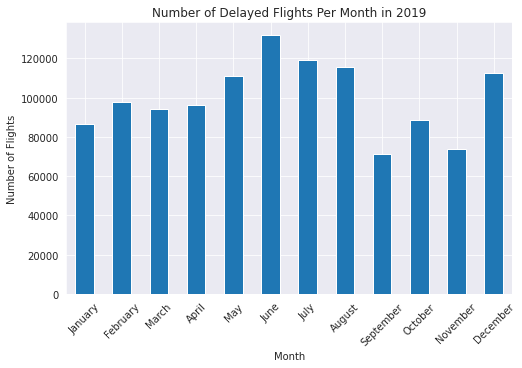

In [ ]:
# Count the number of delayed flights per month in 2019 and then 
# graph according to month order
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

delays.loc[delays['DELAYED'] == 1].groupby(['MONTH'])['MONTH'].count() \
.rename(index=month_dict).plot(kind='bar')

plt.title('Number of Delayed Flights Per Month in 2019')
plt.xlabel('Month')
plt.ylabel('Number of Flights')

plt.xticks(np.arange(0, 12, 1), rotation=45)

plt.show()

#### `MONTH` Insights:
- The month with the most flights in 2019 was August (557,735) and the least was February with (450,197)
- The average number of flights per month in 2019 was 525,545.
- June had the most flights delayed (131,872) while September had the fewest (71,236)
- The average number of delayed flights per month was 99,886.

#### `DAY_OF_WEEK` Analysis


In [ ]:
# Sort days by the number of flights 
delays.groupby(["DAY_OF_WEEK"])["DAY_OF_WEEK"].count().sort_values(
    ascending=False
).rename(index=day_dict)

DAY_OF_WEEK
Friday       942012
Monday       940487
Thursday     929172
Tuesday      920194
Wednesday    912469
Sunday       895808
Saturday     766395
Name: DAY_OF_WEEK, dtype: int64

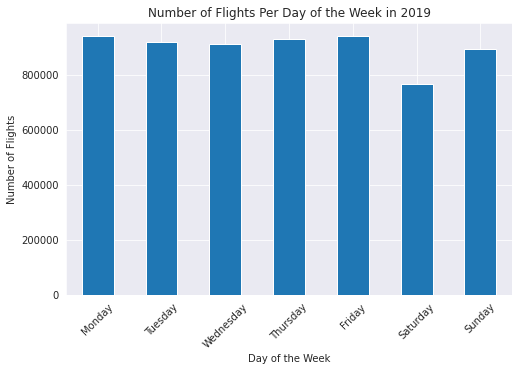

In [ ]:
# Count the number of flights per day in 2019 and then 
# graph according to day order
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

delays.groupby(["DAY_OF_WEEK"])["DAY_OF_WEEK"].count().rename(
    index=day_dict
).plot(kind="bar")

plt.title("Number of Flights Per Day of the Week in 2019")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Flights")

plt.xticks(np.arange(0, 7, 1), rotation=45)

plt.show()


In [ ]:
# Where the flights were delayed, determine the number of flights per day 
# and sort in descending order
delays.loc[delays["DELAYED"] == 1].groupby(["DAY_OF_WEEK"])[
    "DAY_OF_WEEK"
].count().sort_values(ascending=False).rename(index=day_dict)

DAY_OF_WEEK
Thursday     192466
Friday       189233
Monday       187016
Sunday       173229
Wednesday    165505
Tuesday      161141
Saturday     130039
Name: DAY_OF_WEEK, dtype: int64

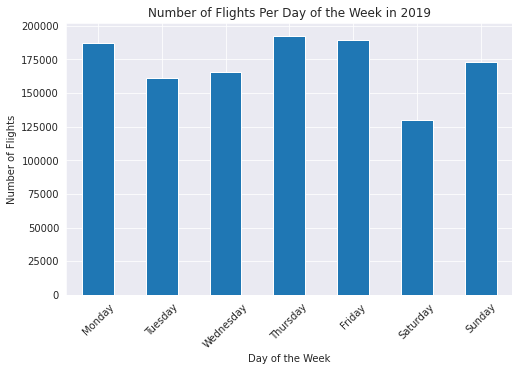

In [ ]:
# Count the number of delayed flights per day in 2019 and then 
# graph according to day order
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

delays.loc[delays["DELAYED"] == 1].groupby(["DAY_OF_WEEK"])[
    "DAY_OF_WEEK"
].count().rename(index=day_dict).plot(kind="bar")

plt.title("Number of Flights Per Day of the Week in 2019")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Flights")

plt.xticks(np.arange(0, 7, 1), rotation=45)

plt.show()

#### `DAY_OF_WEEK` Insights: 
- Friday is the most popular (942,012) while Saturday is the least popular day to fly (766,395). Turns out, after a quick google search, Saturday is one of the cheapest days to fly.
- Thursdays had the most delayed flights (192,466) of any day of the week.
- Saturday had the fewest delayed flights (130,039) of any day of the week.


#### `DEP_HOUR` Analysis

In [ ]:
# Determine the total number of flights that departed in a given hour
delays.groupby(['DEP_HOUR'])['DEP_HOUR'].count().sort_values(ascending=False)

DEP_HOUR
8     446244
7     420436
6     410049
17    393612
10    387175
9     386639
12    385806
11    381704
15    376502
14    364571
18    362569
16    358949
19    351151
13    341721
20    337799
21    218741
22    191892
0     141323
23     49654
Name: DEP_HOUR, dtype: int64

##### Determine if there is a specific reason for the minimal number of scheduled departures at 11:00 pm.

In [ ]:
# Filters dataset to show only flights that took off at 11:00 pm
delays.loc[delays['DEP_HOUR'] == 23]

MONTH  DAY_OF_WEEK  DEP_HOUR  DELAYED  NUMBER_OF_SEATS  \
10           1            7        23        1              180   
38           1            7        23        1              129   
69           1            7        23        1              178   
82           1            7        23        0              178   
83           1            7        23        1              182   
...        ...          ...       ...      ...              ...   
6488907     12            3        23        0              123   
6488956     12            7        23        0              154   
6488996     12            7        23        0              199   
6488999     12            7        23        0              157   
6489019     12            7        23        0              123   

                   CARRIER_NAME  PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  \
10       Frontier Airlines Inc.          3  McCarran International    36.080   
38              JetBlue Airways         11  McCarran International    36.080   
69             Spirit Air Lines          6  McCarran International    36.080   
82             Spirit Air Lines          5  McCarran International    36.080   
83             Spirit Air Lines          3  McCarran International    36.080   
...                         ...        ...                     ...       ...   
6488907  Hawaiian Airlines Inc.         18         Kahului Airport    20.901   
6488956   United Air Lines Inc.         11         Kahului Airport    20.901   
6488996    Delta Air Lines Inc.         24         Kahului Airport    20.901   
6488999    Alaska Airlines Inc.         11         Kahului Airport    20.901   
6489019  Hawaiian Airlines Inc.         18         Kahului Airport    20.901   

         LONGITUDE  PRCP  TMAX  
10        -115.152   0.0  65.0  
38        -115.152   0.0  65.0  
69        -115.152   0.0  65.0  
82        -115.152   0.0  65.0  
83        -115.152   0.0  65.0  
...            ...   ...   ...  
6488907   -156.434   0.0  85.0  
6488956   -156.434   0.0  84.0  
6488996   -156.434   0.0  84.0  
6488999   -156.434   0.0  84.0  
6489019   -156.434   0.0  84.0  

[49654 rows x 12 columns]

In [ ]:
delays.loc[delays.DEP_HOUR == 23].head()

MONTH  DAY_OF_WEEK  DEP_HOUR  DELAYED  NUMBER_OF_SEATS  \
10      1            7        23        1              180   
38      1            7        23        1              129   
69      1            7        23        1              178   
82      1            7        23        0              178   
83      1            7        23        1              182   

              CARRIER_NAME  PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  \
10  Frontier Airlines Inc.          3  McCarran International     36.08   
38         JetBlue Airways         11  McCarran International     36.08   
69        Spirit Air Lines          6  McCarran International     36.08   
82        Spirit Air Lines          5  McCarran International     36.08   
83        Spirit Air Lines          3  McCarran International     36.08   

    LONGITUDE  PRCP  TMAX  
10   -115.152   0.0  65.0  
38   -115.152   0.0  65.0  
69   -115.152   0.0  65.0  
82   -115.152   0.0  65.0  
83   -115.152   0.0  65.0

In [ ]:
# Determine if its only certain months or days that offer flights at this time
print(
    delays.loc[delays["DEP_HOUR"] == 23, ["MONTH"]]
    .groupby(["MONTH"])["MONTH"]
    .count()
)
print(
    delays.loc[delays["DEP_HOUR"] == 23, ["DAY_OF_WEEK"]]
    .groupby(["DAY_OF_WEEK"])["DAY_OF_WEEK"]
    .count()
)

MONTH
1     3230
2     2865
3     4084
4     3669
5     4059
6     4880
7     5475
8     5125
9     3708
10    3889
11    4223
12    4447
Name: MONTH, dtype: int64
DAY_OF_WEEK
1    7319
2    6749
3    6866
4    7529
5    7557
6    5848
7    7786
Name: DAY_OF_WEEK, dtype: int64


In [ ]:
# Determine if its only select carriers or airports that offer flights at this 
# time
print(
    "Count of carriers with 11pm departure:",
    len(
        delays.loc[delays["DEP_HOUR"] == 23, ["CARRIER_NAME"]]
        .groupby(["CARRIER_NAME"])["CARRIER_NAME"]
        .unique()
    ),
)
print("Total carrier count:", len(delays.CARRIER_NAME.unique()))
print(
    "Count of airports with 11pm departure:",
    len(
        delays.loc[delays["DEP_HOUR"] == 23, ["DEPARTING_AIRPORT"]]
        .groupby(["DEPARTING_AIRPORT"])["DEPARTING_AIRPORT"]
        .unique()
    ),
)
print("Total airport count:", len(delays.DEPARTING_AIRPORT.unique()))

Count of carriers with 11pm departure: 17
Total carrier count: 17
Count of airports with 11pm departure: 46
Total airport count: 76


It appears that only 46 out of 76 airports had flights that departed at 11 pm in 2019. I assume this has to do with the night time curfew in place for airplane departures and landings that we discovered earlier.

##### Continuing on with the analysis

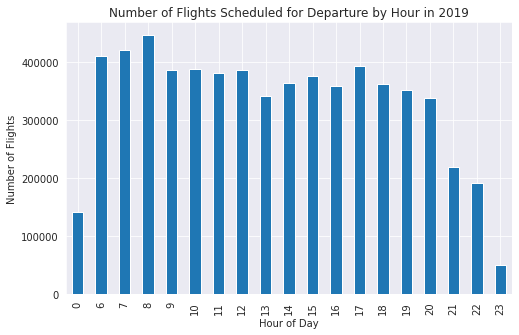

In [ ]:
# Count the number of flights by by hour and then reorder according to hour
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

delays.groupby(["DEP_HOUR"])["DEP_HOUR"].count().plot(kind="bar")

plt.title("Number of Flights Scheduled for Departure by Hour in 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Flights")
plt.show()


In [ ]:
# Where the flights are delayed, determine the number of flights per hour and 
# sort in descending order
delays.loc[delays["DELAYED"] == 1].groupby(["DEP_HOUR"])[
    "DEP_HOUR"
].count().sort_values(ascending=False)

DEP_HOUR
17    100132
18     99093
19     99055
20     91012
16     87551
15     84979
14     79836
12     69881
13     67079
11     62927
21     60508
10     59357
9      51764
8      49553
22     46341
7      39398
6      28254
0      11244
23     10665
Name: DEP_HOUR, dtype: int64

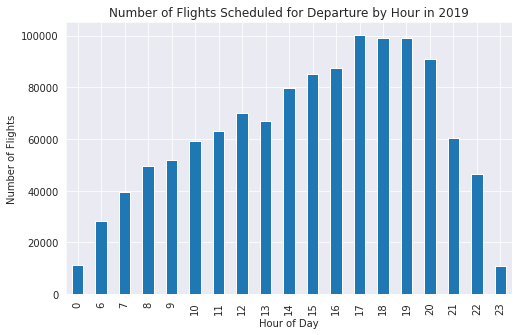

In [ ]:
# Count the number of delayed flights by by hour and then graph according to 
# hour order
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

delays.loc[delays["DELAYED"] == 1].groupby(["DEP_HOUR"])[
    "DEP_HOUR"
].count().plot(kind="bar")

plt.title("Number of Flights Scheduled for Departure by Hour in 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Flights")
plt.show()


#### `DEP_HOUR` Insights:
- Only 46 of the 76 airports in the data set scheduled flights for an 11 pm departure.
- The most popular hour for a flight to be scheduled for departure is 8:00 am (446,244) while 11:00pm is the least (49,654)
- The most flights departed in the morning hours of 6 to 8 am and the fewest departed from 10 pm to 12 pm 
- The most delayed flights occurred at 5 pm while the fewest occurred at 11 pm 

### 4. `CARRIER_NAME`



#### Analysis

In [ ]:
len(delays["CARRIER_NAME"].unique())
# 17 different carriers in the US

17

Determine the number of flights each airline had in 2019

In [ ]:
delays.groupby(["CARRIER_NAME"])["CARRIER_NAME"].count().sort_values(
    ascending=False
)

CARRIER_NAME
Southwest Airlines Co.          1296329
Delta Air Lines Inc.             938346
American Airlines Inc.           903640
United Air Lines Inc.            601044
SkyWest Airlines Inc.            584204
Midwest Airline, Inc.            300154
JetBlue Airways                  269596
Alaska Airlines Inc.             239337
American Eagle Airlines Inc.     228792
Comair Inc.                      219324
Endeavor Air Inc.                203827
Spirit Air Lines                 189419
Mesa Airlines Inc.               177600
Frontier Airlines Inc.           120872
Atlantic Southeast Airlines       99044
Hawaiian Airlines Inc.            74898
Allegiant Air                     42636
Name: CARRIER_NAME, dtype: int64

In [ ]:
1282608 / 6306537 * 100
# Southwest was responsible for more than 20% of all flights in the US in 2019

20.337754301607998

Plot the number of flights by airline in 2019

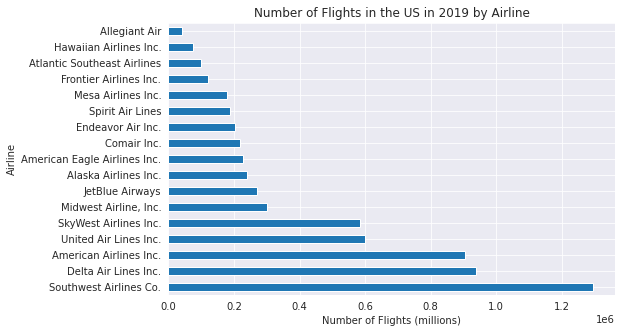

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))

delays.groupby(["CARRIER_NAME"])["CARRIER_NAME"].count().sort_values(
    ascending=False
).plot(kind="barh")

plt.xlabel("Number of Flights (millions)")
plt.ylabel("Airline")
plt.title("Number of Flights in the US in 2019 by Airline")

plt.show()

Sort the airlines by their total counts of delayed flights

In [ ]:
delays.loc[delays["DELAYED"] == 1].groupby(["CARRIER_NAME"])[
    "DELAYED"
].count().sort_values(ascending=False)

CARRIER_NAME
Southwest Airlines Co.          269618
American Airlines Inc.          180010
Delta Air Lines Inc.            135451
United Air Lines Inc.           116207
SkyWest Airlines Inc.           100848
JetBlue Airways                  66371
Midwest Airline, Inc.            47891
Alaska Airlines Inc.             38678
Comair Inc.                      38586
American Eagle Airlines Inc.     37954
Spirit Air Lines                 34916
Endeavor Air Inc.                33815
Mesa Airlines Inc.               33378
Frontier Airlines Inc.           30988
Atlantic Southeast Airlines      21418
Allegiant Air                     6836
Hawaiian Airlines Inc.            5664
Name: DELAYED, dtype: int64

Plot the number of delayed flights by airline in 2019

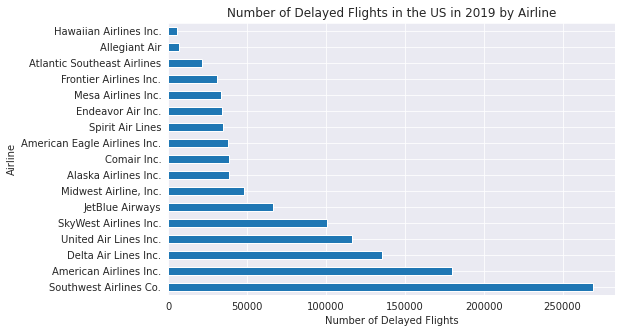

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))

delays.loc[delays["DELAYED"] == 1].groupby(["CARRIER_NAME"])[
    "DELAYED"
].count().sort_values(ascending=False).plot(kind="barh")

plt.xlabel("Number of Delayed Flights")
plt.ylabel("Airline")
plt.title("Number of Delayed Flights in the US in 2019 by Airline")

plt.show()

Determine the number of delayed flights relative to the total number of flights by airline

In [ ]:
# Count were delayed is true for each airline / Count for each airline
airline_delays_perc = (
    delays.loc[delays["DELAYED"] == 1]
    .groupby(["CARRIER_NAME"])["DELAYED"]
    .count()
    / delays.groupby(["CARRIER_NAME"])["DELAYED"].count()
) * 100
airline_delays_perc.sort_values(ascending=False, inplace=True)
airline_delays_perc

CARRIER_NAME
Frontier Airlines Inc.          26.142048
JetBlue Airways                 25.732076
Atlantic Southeast Airlines     22.977728
Southwest Airlines Co.          21.021076
American Airlines Inc.          20.102248
United Air Lines Inc.           19.588465
Comair Inc.                     19.588294
Mesa Airlines Inc.              19.530720
Allegiant Air                   18.891284
Spirit Air Lines                18.706370
American Eagle Airlines Inc.    18.044548
SkyWest Airlines Inc.           17.834715
Endeavor Air Inc.               17.420086
Alaska Airlines Inc.            16.484046
Midwest Airline, Inc.           16.358339
Delta Air Lines Inc.            14.758226
Hawaiian Airlines Inc.           9.487278
Name: DELAYED, dtype: float64

Plot the percent of delayed flights by airline

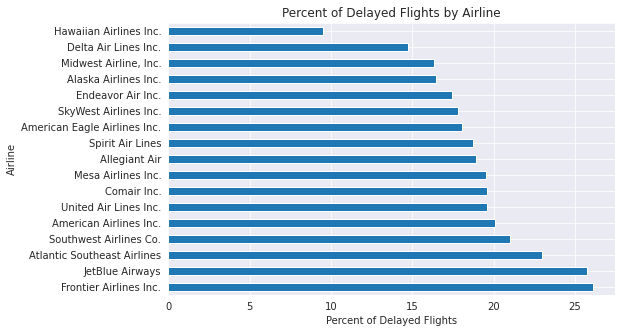

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

airline_delays_perc.plot(y="DELAYED", use_index=True, kind="barh")

plt.xlabel("Percent of Delayed Flights")
plt.ylabel("Airline")
plt.title("Percent of Delayed Flights by Airline")

plt.show()

#### Insights:
- There are 17 different airline carriers in the US
- Southwest Airlines Co. had the most flights in 2019 (1,282,608) while Allegiant Air had the fewest (36,186)
- Southwest Airlines Co. was responsible for more than 20% of all flights in the US in 2019
- Southwest Airlines Co. had the most delayed flights (269,618) while Hawaiian Airlines Inc. had the fewest (5,664).
- Frontier Airlines Inc. had the highest percent of delayed flights relative to their total number of flights (26.1 %). Hawaiian Airlines Inc. had the lowest (9.5 %).

### 5. Plane Details: `NUMBER_OF_SEATS` and `PLANE_AGE`

#### `NUMBER_OF_SEATS` Analysis

In [ ]:
# Numerically describe the distribution of total seats in airplanes
delays['NUMBER_OF_SEATS'].describe()

count    6.306537e+06
mean     1.344101e+02
std      4.642628e+01
min      4.400000e+01
25%      9.000000e+01
50%      1.430000e+02
75%      1.720000e+02
max      3.370000e+02
Name: NUMBER_OF_SEATS, dtype: float64

In [ ]:
# Determine the number of unique seat quantities a plane could have
len(delays['NUMBER_OF_SEATS'].unique())

82

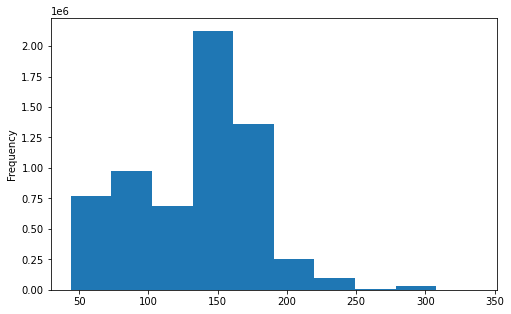

In [ ]:
# Show the distribution of the number of seats in a plane using a histogram 
# chart
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

delays['NUMBER_OF_SEATS'].plot(kind='hist')

plt.xlabel('Number of Seats')
plt.ylabel('Frequency (in millions)')
plt.title('Histogram of Number of Seats by Frequency')

plt.show()

#### `NUMBER_OF_SEATS` Insights:
- In 2019, an airplane had 134 seats on average.
- The smallest airplane had 44 seats while the largest had 337.
- There were 82 different amounts of seats in an airplane

#### `NUMBER_OF_SEATS` vs `DELAYED` Correlation

Question: How does the number of seats in a plane correlate with the number of delayed flights?

Hypothesis: I would wager that the greater the number of seats on a plane, the more likely it will be delayed. (This is based on the simple logic that the capacity for more passengers decreases the efficiency of the boarding process by increasing dissonance)

In [ ]:
# Determine the count of delayed flights for each number of seat a plane could 
# have in 2019
delayed_num_seats_df = pd.DataFrame(
    delays.loc[delays["DELAYED"] == 1]
    .groupby(["NUMBER_OF_SEATS"])["DELAYED"]
    .count()
)
delayed_num_seats_df = delayed_num_seats_df.reset_index()
delayed_num_seats_df.head()

NUMBER_OF_SEATS  DELAYED
0               44    10952
1               50    71119
2               65     1221
3               66    23421
4               69     7924

In [ ]:
# Determine the pearson correlation coefficient
corr_coef = delayed_num_seats_df["NUMBER_OF_SEATS"].corr(
    delayed_num_seats_df["DELAYED"], method="pearson"
)
corr_coef

-0.33469073864998494

#### `NUMBER_OF_SEATS` vs `DELATED` Correlation Insights:
The correlation coefficient between the number of seats and the number of delayed flights is: -0.33. This is relatively weak correlation coefficient and therefore suggests there is little to no linear relationship between these variables.

#### `PLANE_AGE` Analysis

In [ ]:
# Numerically describe the distribution of plane age
delays['PLANE_AGE'].describe()

count    6.306537e+06
mean     1.151911e+01
std      6.936634e+00
min      0.000000e+00
25%      5.000000e+00
50%      1.200000e+01
75%      1.700000e+01
max      3.200000e+01
Name: PLANE_AGE, dtype: float64

In [ ]:
# Determine the amount of unique plane ages
len(delays['PLANE_AGE'].unique())

33

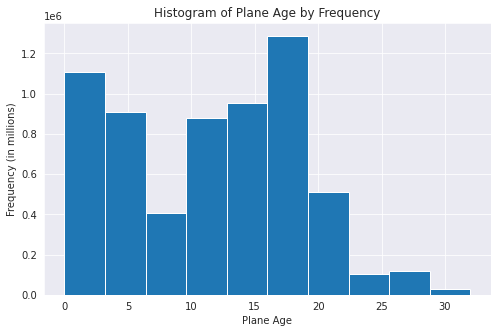

In [ ]:
# Show the distribution of the ages of planes using a histogram chart
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

delays['PLANE_AGE'].plot(kind='hist')

plt.xlabel('Plane Age')
plt.ylabel('Frequency (in millions)')
plt.title('Histogram of Plane Age by Frequency')

plt.show()

#### `PLANE_AGE` Insights:
- The average plane was 11.5 years old in 2019
- The youngest plane to fly was brand new with an age of 0
- The oldest plane to fly was 32
- There was at least one plane for every year from age 0 to 33.

#### `PLANE_AGE` vs `DELAYED` Correlation

Question: Does the plane age have any sort of correlation with the number of flights that were delayed?

Hypotheses: I don't think the plane age would have a correlation with the number of delayed flights. I believe that if a plane is available for transit, then it is only as efficient as its flight crew, its passengers, and the airport from which it departs.

In [ ]:
# Determine the count of delayed flights for each year of age a plane could have
# been in 2019
plane_age_df = pd.DataFrame(
    delays.loc[delays["DELAYED"] == 1].groupby(["PLANE_AGE"])["DELAYED"].count()
)
plane_age_df = plane_age_df.reset_index()
plane_age_df.head()

PLANE_AGE  DELAYED
0          0    19763
1          1    49840
2          2    59291
3          3    68384
4          4    60750

In [ ]:
# Determine the pearson correlation coefficient
corr_coef = plane_age_df["PLANE_AGE"].corr(
    plane_age_df["DELAYED"], method="pearson"
)
corr_coef

-0.6261888650589323

#### `PLANE_AGE` vs `DELAYED` Correlation Insights:
The correlation coefficient between the number of seats and the number of delayed flights is -0.63 which suggests a moderate, negative linear relationship between these two variables.

### 6. `DEPARTING_AIRPORT`


#### Analysis

In [ ]:
# Airports by number of flights
delays['DEPARTING_AIRPORT'].value_counts().head(10)

Atlanta Municipal                   392603
Chicago O'Hare International        329045
Dallas Fort Worth Regional          296449
Stapleton International             247175
Douglas Municipal                   231855
Los Angeles International           217120
Houston Intercontinental            177108
Phoenix Sky Harbor International    172969
San Francisco International         167270
LaGuardia                           166709
Name: DEPARTING_AIRPORT, dtype: int64

In [ ]:
# Numerical summary of the distribution of delayed flights across airports
delays['DEPARTING_AIRPORT'].value_counts().describe()

count        76.000000
mean      82980.750000
std       78024.393526
min       16621.000000
25%       25281.500000
50%       52919.000000
75%      118776.750000
max      392603.000000
Name: DEPARTING_AIRPORT, dtype: float64

In [ ]:
print(delays['DEPARTING_AIRPORT'].value_counts().head(1))
print(delays['DEPARTING_AIRPORT'].value_counts().tail(1))

Atlanta Municipal    392603
Name: DEPARTING_AIRPORT, dtype: int64
Des Moines Municipal    16621
Name: DEPARTING_AIRPORT, dtype: int64


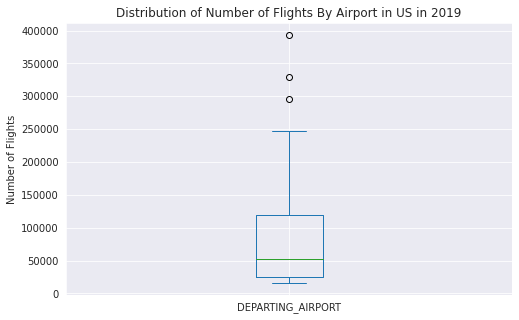

In [ ]:
# Outlier detection
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

delays['DEPARTING_AIRPORT'].value_counts().plot(kind='box')

# Add titles to graph and its axes
plt.ylabel('Number of Flights')
plt.title('Distribution of Number of Flights By Airport in US in 2019')

plt.show()

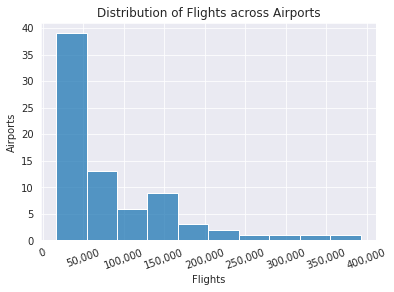

In [ ]:
# Distribution of flights in 2019
sns.histplot(delays['DEPARTING_AIRPORT'].value_counts(), bins=10)

# Add titles to graph and its axes
plt.xlabel("Flights")
plt.ylabel('Airports')
plt.title("Distribution of Flights across Airports")

# Reformat x-tick labels
plt.xticks(
    np.arange(0, 450000, 50000),
    [
        "0",
        "50,000",
        "100,000",
        "150,000",
        "200,000",
        "250,000",
        "300,000",
        "350,000",
        "400,000",
    ],
    rotation=20,
)

plt.show()

#### Insights:
- The data contains information for 76 unique airports
- These airports had an average of 82,981 flights in 2019.
- Three quarters of the airports in the dataset had under 119,000 flights
- There are only 3 airports with over 250,000 flights (Atlanta Municipal, Chicago O'Hare International, and Dallas Fort Worth Regional)
- The Des Moines Municipal airport had the fewest number of flights in 2019 (16,621) while the Atlanta Municipal airport had the most (392,603)

### 7. `LATITUDE` and `LONGITUDE`

Initial Questions:
- What region(s) of the US have the most flights?
- Do any particular regions of the US have greater counts of delayed flights?

#### Analysis

##### Preliminary check of column data and info

In [ ]:
delays[['LONGITUDE', 'LATITUDE']].head()

In [ ]:
delays[['LONGITUDE', 'LATITUDE']].info()  # type float

##### Determine the Sample Size

In [ ]:
print(delays[['DELAYED', 'LONGITUDE', 'LATITUDE']].shape)
print(6306537 * 0.05)

(6306537, 3)
315326.85000000003


##### Plot a Sample of Flights on a Denstiy Map

In [ ]:
# Take a sample of delays and set random_state to 10 for reproducibility
sample_delays = delays[["DELAYED", "LONGITUDE", "LATITUDE"]].sample(
    frac=0.05, random_state=10
)

In [ ]:
# create tuples of lat, long combinations from sample df
sd_lat_long_pairs = zip(
    list(sample_delays.LATITUDE), list(sample_delays.LONGITUDE)
)

In [ ]:
# create map object with a starting point and zoom
map = folium.Map(location=[39.8283, -98.5795], zoom_start = 5.2)
HeatMap(sd_lat_long_pairs).add_to(map)  # add coordinates to the map
map  # show map

##### Plot a Sample of Delayed Flights on a Density Map

In [ ]:
# Take a sample of delays and set random_state to 10 for reproducibility
sample_delayed_flights = delays.loc[
    delays["DELAYED"] == 1, ["DELAYED", "LONGITUDE", "LATITUDE"]
].sample(frac=0.05, random_state=10)


In [ ]:
# create tuples of lat, long combinations from sample df
sdf_lat_long_pairs = zip(
    list(sample_delayed_flights.LATITUDE),
    list(sample_delayed_flights.LONGITUDE),
)

In [ ]:
# create map object with a starting point and zoom
map = folium.Map(location=[39.8283, -98.5795], zoom_start = 5.2)
HeatMap(sdf_lat_long_pairs).add_to(map)  # add coordinates to the map
map  # show map

#### Density Map of a Sample of All Flights Insights:
- From a very zoomed out view it appears that the east coast has the greatest flight density. 
- On an individual airport level, the top three airports with the most traffic seem to be Atlanta, Chicago and Dallas, in descending order. 
- There are three airports in NJ and NY that makes its appearence seem denser in flights when zoomed out enough.

#### Density Map of a Sample of Only Delayed Flights Insights:
- A similar trend to what was previously observed from the total flight count map was seen in a zoomed out perspective of this map.
- While the top three airports with the most delayed flights were the same, the order was different: Chicago was by far the most delayed airport, while Atlanta and Dallas were essentially the same. 

### 8.Examining Numerical Feature Relationships

In [ ]:
delays.head()

MONTH  DAY_OF_WEEK  DEP_HOUR  DELAYED  NUMBER_OF_SEATS  \
0      1            7         8        0              143   
1      1            7         7        0              191   
2      1            7         6        0              199   
3      1            7         6        0              180   
4      1            7         0        0              182   

             CARRIER_NAME  PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  \
0  Southwest Airlines Co.          8  McCarran International     36.08   
1    Delta Air Lines Inc.          3  McCarran International     36.08   
2    Delta Air Lines Inc.         18  McCarran International     36.08   
3    Delta Air Lines Inc.          2  McCarran International     36.08   
4        Spirit Air Lines          1  McCarran International     36.08   

   LONGITUDE  PRCP  TMAX  
0   -115.152   0.0  65.0  
1   -115.152   0.0  65.0  
2   -115.152   0.0  65.0  
3   -115.152   0.0  65.0  
4   -115.152   0.0  65.0

####Graph the numerical variables against each other to view any possible relationships. Only use a subset of the data since the data set is so large

In [ ]:
sample_delays = delays.sample(frac=0.01, random_state=10)
len(sample_delays)

63065

In [ ]:
sample_delays.columns

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_HOUR', 'DELAYED', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PRCP', 'TMAX'],
      dtype='object')

<Figure size 576x360 with 0 Axes>

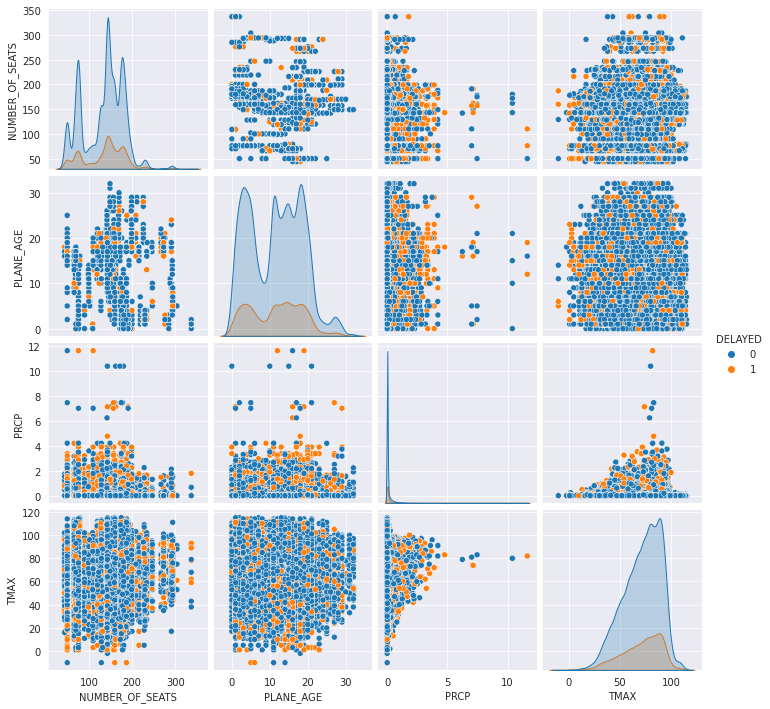

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

sns.pairplot(
    sample_delays,
    vars=["NUMBER_OF_SEATS", "PLANE_AGE", "PRCP", "TMAX"],
    hue="DELAYED",
)

plt.show()

There doesn't appear to be any obvious relationships between the numerical variables

#### Confirm the above using a correlation matrix and a heat map

In [ ]:
corr_df = (
    delays[["NUMBER_OF_SEATS", "PLANE_AGE", "PRCP", "TMAX"]].corr().round(2)
)


In [ ]:
corr_df

NUMBER_OF_SEATS  PLANE_AGE  PRCP  TMAX
NUMBER_OF_SEATS             1.00      -0.11 -0.01  0.06
PLANE_AGE                  -0.11       1.00  0.01  0.00
PRCP                       -0.01       0.01  1.00 -0.02
TMAX                        0.06       0.00 -0.02  1.00

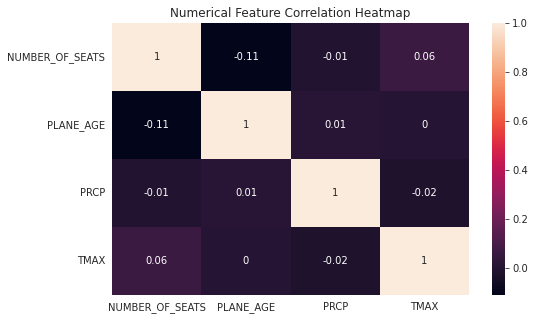

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))

sns.heatmap(corr_df, annot=True)

plt.title("Numerical Feature Correlation Heatmap")

plt.show()

## Questions from EDA


In [ ]:
delays.head()

MONTH  DAY_OF_WEEK  DEP_HOUR  DELAYED  NUMBER_OF_SEATS  \
0      1            7         8        0              143   
1      1            7         7        0              191   
2      1            7         6        0              199   
3      1            7         6        0              180   
4      1            7         0        0              182   

             CARRIER_NAME  PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  \
0  Southwest Airlines Co.          8  McCarran International     36.08   
1    Delta Air Lines Inc.          3  McCarran International     36.08   
2    Delta Air Lines Inc.         18  McCarran International     36.08   
3    Delta Air Lines Inc.          2  McCarran International     36.08   
4        Spirit Air Lines          1  McCarran International     36.08   

   LONGITUDE  PRCP  TMAX  
0   -115.152   0.0  65.0  
1   -115.152   0.0  65.0  
2   -115.152   0.0  65.0  
3   -115.152   0.0  65.0  
4   -115.152   0.0  65.0


### 1. Which airlines have the oldest planes, on average?




In [ ]:
# Groups by `CARRIER_NAME` and then performs mean on `PLANE_AGE`
plane_age_carrier = (
    delays.groupby("CARRIER_NAME")["PLANE_AGE"]
    .agg(["mean"])
    .round(2)
    .sort_values("mean", ascending=False)
    .reset_index(level=0)
)


plane_age_carrier

CARRIER_NAME   mean
0          United Air Lines Inc.  15.24
1           Delta Air Lines Inc.  14.54
2         Hawaiian Airlines Inc.  13.48
3         Southwest Airlines Co.  12.11
4   American Eagle Airlines Inc.  11.25
5         American Airlines Inc.  11.20
6                  Allegiant Air  11.00
7    Atlantic Southeast Airlines  10.90
8              Endeavor Air Inc.  10.59
9                JetBlue Airways  10.58
10         SkyWest Airlines Inc.   9.90
11            Mesa Airlines Inc.   9.67
12                   Comair Inc.   9.61
13         Midwest Airline, Inc.   9.44
14          Alaska Airlines Inc.   8.24
15              Spirit Air Lines   5.43
16        Frontier Airlines Inc.   3.96

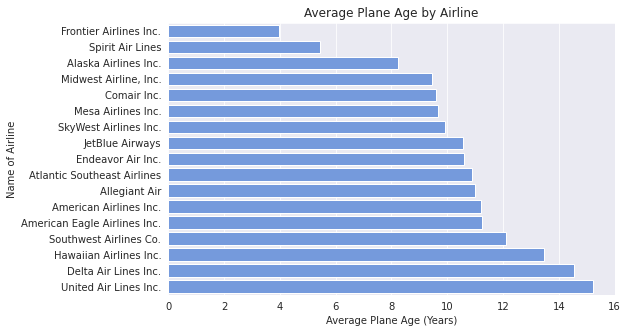

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))


sns.barplot(
    data=plane_age_carrier.sort_values("mean", ascending=True),
    x="mean",
    y="CARRIER_NAME",
    color='cornflowerblue'
)

plt.title("Average Plane Age by Airline")
plt.xlabel("Average Plane Age (Years)")
plt.ylabel("Name of Airline")


plt.show()

As of 2019, the average plane in the United Air Lines fleet was 15.24 years of age. This was the highest in the data set. The next oldest fleet belonged to Delta Air Lines with their average plane age sitting at 14.54 years old. The youngest fleet belonged to Frontier Airlines with an average plane age of 3.96.

### 2. What state has the most airports in the data set? Use a map to visualize the airport locations

In [ ]:
# get the airport coords and save to df
airport_coords = (
    delays[["DEPARTING_AIRPORT", "LONGITUDE", "LATITUDE"]]
    .drop_duplicates()
    .reset_index(drop=True)
    .sort_values("DEPARTING_AIRPORT", ascending=True)
)

airport_coords

DEPARTING_AIRPORT  LONGITUDE  LATITUDE
57  Albuquerque International Sunport   -106.606    35.042
54            Anchorage International   -149.985    61.169
13                  Atlanta Municipal    -84.427    33.641
27   Austin - Bergstrom International    -97.670    30.194
68                 Birmingham Airport    -86.756    33.563
..                                ...        ...       ...
32               Tucson International   -110.941    32.116
14                Tulsa International    -95.890    36.198
34    Washington Dulles International    -77.458    38.942
45                  Will Rogers World    -97.602    35.392
73                    William P Hobby    -95.279    29.645

[76 rows x 3 columns]

In [ ]:
# create map object with a starting point and zoom
map = folium.Map(
    location=[39.8283, -98.5795], zoom_start=5.2
)

# add pop markers for each airport to map
for i in airport_coords.itertuples():
    folium.Marker(
        location=[i.LATITUDE, i.LONGITUDE],
        popup=i.DEPARTING_AIRPORT,
        icon=folium.Icon(icon="plane"),
    ).add_to(map)

map

Just by counting the popup markers, it can be observed that California has the most airports with 9 different locations. (This conclusion is based off of the airport locations available in the data set.)

### 3. How do the average high temperatures fare at the different airports found in the data set? Visualize the answer.


In [ ]:
# Get the weather averages by airport
airport_weather = (
    delays.groupby("DEPARTING_AIRPORT")[["PRCP", "TMAX"]]
    .agg(["mean"])
    .reset_index(level=0)
    .droplevel(1, axis=1)
)

airport_weather

DEPARTING_AIRPORT      PRCP       TMAX
0   Albuquerque International Sunport  0.024179  70.681408
1             Anchorage International  0.037285  52.868494
2                   Atlanta Municipal  0.115208  76.031655
3    Austin - Bergstrom International  0.079203  81.727534
4                  Birmingham Airport  0.137464  77.301731
..                                ...       ...        ...
71               Tucson International  0.016792  84.986972
72                Tulsa International  0.121497  71.027889
73    Washington Dulles International  0.109215  68.324760
74                  Will Rogers World  0.122751  71.244620
75                    William P Hobby  0.146891  80.521700

[76 rows x 3 columns]

In [ ]:
airport_data = pd.merge(
    airport_weather, airport_coords, on="DEPARTING_AIRPORT", how="inner"
)

airport_data

DEPARTING_AIRPORT      PRCP       TMAX  LONGITUDE  \
0   Albuquerque International Sunport  0.024179  70.681408   -106.606   
1             Anchorage International  0.037285  52.868494   -149.985   
2                   Atlanta Municipal  0.115208  76.031655    -84.427   
3    Austin - Bergstrom International  0.079203  81.727534    -97.670   
4                  Birmingham Airport  0.137464  77.301731    -86.756   
..                                ...       ...        ...        ...   
71               Tucson International  0.016792  84.986972   -110.941   
72                Tulsa International  0.121497  71.027889    -95.890   
73    Washington Dulles International  0.109215  68.324760    -77.458   
74                  Will Rogers World  0.122751  71.244620    -97.602   
75                    William P Hobby  0.146891  80.521700    -95.279   

    LATITUDE  
0     35.042  
1     61.169  
2     33.641  
3     30.194  
4     33.563  
..       ...  
71    32.116  
72    36.198  
73    38.942  
74    35.392  
75    29.645  

[76 rows x 5 columns]

In [ ]:
airport_data['TMAX'].describe()

count    76.000000
mean     70.993588
std       8.758724
min      52.868494
25%      63.630602
50%      71.046337
75%      77.983253
max      86.306276
Name: TMAX, dtype: float64

In [ ]:
# establish color scale for temperature
colormap = cm.LinearColormap(
    colors=["yellow", "red"], index=[50, 90], vmin=50, vmax=90
)

In [ ]:
# create map object with a starting point and zoom
map = folium.Map(
    location=[39.8283, -98.5795], zoom_start=5.2
)

# add circle markers to map
for i in airport_data.itertuples():
    folium.CircleMarker(
        location=[i.LATITUDE, i.LONGITUDE],
        popup="{}: {}".format(i.DEPARTING_AIRPORT, i.TMAX),
        fill=True,
        color=colormap(i.TMAX),
        icon=folium.Icon(icon="plane"),
    ).add_to(map)

# add color scale to top right of map
map.add_child(colormap)
map

### 4. In my trips abroad, I have flown on United, American, and Delta and, after the EDA, am curious to see how they stack up against other airlines in terms of the number of delayed flights.

In [ ]:
delays.CARRIER_NAME.unique()

array(['Southwest Airlines Co.', 'Delta Air Lines Inc.',
       'Spirit Air Lines', 'Frontier Airlines Inc.',
       'Alaska Airlines Inc.', 'Hawaiian Airlines Inc.',
       'American Airlines Inc.', 'United Air Lines Inc.',
       'JetBlue Airways', 'Allegiant Air', 'SkyWest Airlines Inc.',
       'Mesa Airlines Inc.', 'American Eagle Airlines Inc.',
       'Midwest Airline, Inc.', 'Comair Inc.', 'Endeavor Air Inc.',
       'Atlantic Southeast Airlines'], dtype=object)

In [ ]:
# create new df with all carrier names and delayed statuses from all flights
past_airlines = delays[['DELAYED', 'CARRIER_NAME']].copy()
past_airlines.head()

DELAYED            CARRIER_NAME
0        0  Southwest Airlines Co.
1        0    Delta Air Lines Inc.
2        0    Delta Air Lines Inc.
3        0    Delta Air Lines Inc.
4        0        Spirit Air Lines

In [ ]:
# redefine df as a function of delayed flight counts per airline
past_airlines = pd.DataFrame(
    past_airlines.loc[past_airlines["DELAYED"] == 1]
    .groupby(["CARRIER_NAME"])["DELAYED"]
    .count()
).reset_index(level=0)

past_airlines.head()

CARRIER_NAME  DELAYED
0          Alaska Airlines Inc.    38678
1                 Allegiant Air     6836
2        American Airlines Inc.   180010
3  American Eagle Airlines Inc.    37954
4   Atlantic Southeast Airlines    21418

In [ ]:
# list of the names of airlines I have flown with
names = [
    "American Airlines Inc.",
    "Delta Air Lines Inc.",
    "United Air Lines Inc.",
]

# create a new column that indicates if airline is in names list
past_airlines["FLOWN_WITH"] = [
    1 if x in names else 0 for x in past_airlines["CARRIER_NAME"]
]
past_airlines.head()

CARRIER_NAME  DELAYED  FLOWN_WITH
0          Alaska Airlines Inc.    38678           0
1                 Allegiant Air     6836           0
2        American Airlines Inc.   180010           1
3  American Eagle Airlines Inc.    37954           0
4   Atlantic Southeast Airlines    21418           0

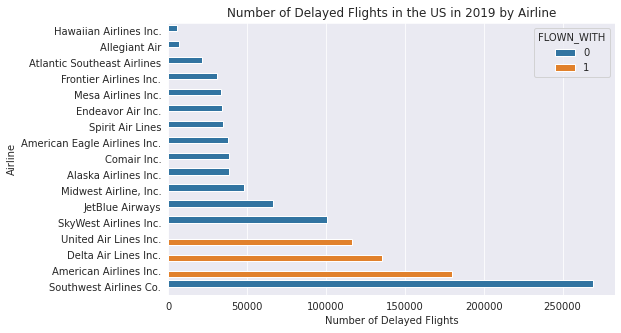

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

sns.barplot(
    data=past_airlines.sort_values("DELAYED", ascending=True),
    x="DELAYED",
    y="CARRIER_NAME",
    hue="FLOWN_WITH",
)

# Add titles to graph and its axes
plt.xlabel("Number of Delayed Flights")
plt.ylabel("Airline")
plt.title("Number of Delayed Flights in the US in 2019 by Airline")

plt.show()